# imports

In [1]:
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt

# data

In [ ]:
generator_path = '../../0DataGeneration/gen/' 
trials = generator_path+'trials.csv'
trials = pd.read_csv(trials, index_col=0)
trials

,6000,1001,14000,8016,name,filename,ptrac_filename
index,,,,,,,
0,-0.000100,-0.000100,-0.466600,-0.533200,concentration_C_0001_Si_4666,../compute/output/mctal/concentration_C_0001_S...,../compute/output/ptrac/concentration_C_0001_S...
1,-0.008667,-0.000300,-0.461600,-0.529433,concentration_C_008666666666666666_Si_4616,../compute/output/mctal/concentration_C_008666...,../compute/output/ptrac/concentration_C_008666...
2,-0.017233,-0.000500,-0.456600,-0.525667,concentration_C_017233333333333333_Si_4566,../compute/output/mctal/concentration_C_017233...,../compute/output/ptrac/concentration_C_017233...
3,-0.025800,-0.000700,-0.451600,-0.521900,concentration_C_0258_Si_4516,../compute/output/mctal/concentration_C_0258_S...,../compute/output/ptrac/concentration_C_0258_S...
4,-0.034933,-0.000967,-0.446267,-0.517833,concentration_C_03493333333333333_Si_446266666...,../compute/output/mctal/concentration_C_034933...,../compute/output/ptrac/concentration_C_034933...
5,-0.044067,-0.001233,-0.440933,-0.513767,concentration_C_044066666666666664_Si_44093333...,../compute/output/mctal/concentration_C_044066...,../compute/output/ptrac/concentration_C_044066...
6,-0.053200,-0.001500,-0.435600,-0.509700,concentration_C_0532_Si_4356,../compute/output/mctal/concentration_C_0532_S...,../compute/output/ptrac/concentration_C_0532_S...
7,-0.073800,-0.002067,-0.423600,-0.500533,concentration_C_0738_Si_4236,../compute/output/mctal/concentration_C_0738_S...,../compute/output/ptrac/concentration_C_0738_S...
8,-0.094400,-0.002633,-0.411600,-0.491367,concentration_C_0944_Si_4116,../compute/output/mctal/concentration_C_0944_S...,../compute/output/ptrac/concentration_C_0944_S...


In [15]:
true_c_concentrations = trials['6000'].values
true_c_concentrations = np.array([float(x) for x in true_c_concentrations])
true_c_concentrations = -true_c_concentrations
true_c_concentrations = true_c_concentrations.tolist()

true_si_concentrations = trials['14000'].values
true_si_concentrations = np.array([float(x) for x in true_si_concentrations])
true_si_concentrations = -true_si_concentrations
true_si_concentrations = true_si_concentrations.tolist()

concentrations = [[si, c] for c, si in zip(true_c_concentrations, true_si_concentrations)]


In [16]:
spectrums = generator_path+'spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y']

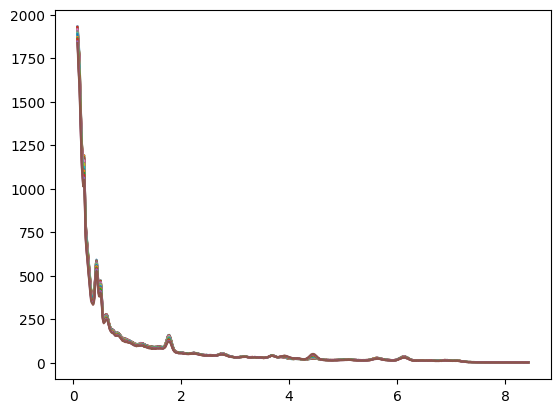

In [19]:
plt.figure()
for _, spectrum in enumerate(spectrums):
    plt.plot(bins[10:], spectrum[0][:][10:])
# plt.xlim(4.2, 4.8)
# plt.ylim(0, 100)
plt.show()

# Add Spectrums

In [29]:
Analyzer = insd.Analyzer()

In [30]:
for _, spectrum in enumerate(spectrums):
    Analyzer.addSpectrum(
        [bins,spectrum[0]], 
        trials['name'][_]
        )

In [31]:
spec_labels = [i for i in Analyzer.spectrums.keys()]

In [32]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,concentration_C_0001_Si_4666,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.11, 0.1, 396.91, 535.72, 579.94, 657.28000...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
1,concentration_C_008666666666666666_Si_4616,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.8, 0.09, 396.96, 533.6, 581.9, 656.27, 822...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
2,concentration_C_017233333333333333_Si_4566,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.23, 395.73999999999995, 537.05000000...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
3,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.28, 0.10999999999999999, 396.8400000000000...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
4,concentration_C_03493333333333333_Si_446266666...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.959999999999997, 0.13999999999999999, 398....","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
5,concentration_C_044066666666666664_Si_44093333...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.470000000000002, 0.06, 396.51, 536.77, 583...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
6,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.06, 396.72, 536.51, 585.09, 655.4200...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
7,concentration_C_0738_Si_4236,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.7, 0.10999999999999999, 393.74, 539.62, 58...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
8,concentration_C_0944_Si_4116,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.599999999999998, 0.06, 392.73999999999995,...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
9,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.28, 0.1, 394.44, 536.58, 588.3, 658.9, 843...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False


# Calculate Peak Areas

In [33]:
regression_results, fits = Analyzer.calcPeakAreas(
    spec_labels, 
    returnFits=True, 
    peakWindows={
        'Si1': [1.6, 2.2], 
        'Si2C1': [4.3, 4.61]
        }, 
    baselineFunction='exp_falloff', 
    peakFunction='gaussian'
    )

In [34]:
fits

{'concentration_C_0001_Si_4666': {'Si1': {'bins': array([1.60821, 1.61724, 1.62628, 1.63531, 1.64435, 1.65338, 1.66242,
          1.67145, 1.68049, 1.68952, 1.69856, 1.70759, 1.71663, 1.72566,
          1.7347 , 1.74373, 1.75277, 1.7618 , 1.77084, 1.77987, 1.7889 ,
          1.79794, 1.80697, 1.81601, 1.82504, 1.83408, 1.84311, 1.85215,
          1.86118, 1.87022, 1.87925, 1.88829, 1.89732, 1.90636, 1.91539,
          1.92443, 1.93346, 1.9425 , 1.95153, 1.96057, 1.9696 , 1.97864,
          1.98767, 1.99671, 2.00574, 2.01478, 2.02381, 2.03285, 2.04188,
          2.05091, 2.05995, 2.06898, 2.07802, 2.08705, 2.09609, 2.10512,
          2.11416, 2.12319, 2.13223, 2.14126, 2.1503 , 2.15933, 2.16837,
          2.1774 , 2.18644, 2.19547]),
   'baseline': [96.35015178441608,
    94.22901274428136,
    92.21050044615973,
    90.29389774473204,
    88.47002573528599,
    86.73823642510168,
    85.09023600918334,
    83.52543897919136,
    82.03635128180855,
    80.62244386785697,
    79.27694531

In [54]:
len(fits['concentration_C_0001_Si_4666']['Si2C1']['bins'])

35

In [55]:
fits['concentration_C_0001_Si_4666']['Si2C1']['bins']

array([4.30059, 4.30962, 4.31866, 4.32769, 4.33673, 4.34576, 4.35479,
       4.36383, 4.37286, 4.3819 , 4.39093, 4.39997, 4.409  , 4.41804,
       4.42707, 4.43611, 4.44514, 4.45418, 4.46321, 4.47225, 4.48128,
       4.49032, 4.49935, 4.50839, 4.51742, 4.52646, 4.53549, 4.54453,
       4.55356, 4.5626 , 4.57163, 4.58067, 4.5897 , 4.59873, 4.60777])

In [35]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,concentration_C_0001_Si_4666,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.11, 0.1, 396.91, 535.72, 579.94, 657.28000...","{'Si1': 10.573682481618622, 'Si2C1': 0.8372544...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
1,concentration_C_008666666666666666_Si_4616,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.8, 0.09, 396.96, 533.6, 581.9, 656.27, 822...","{'Si1': 10.319673650169724, 'Si2C1': 0.9567391...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
2,concentration_C_017233333333333333_Si_4566,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.23, 395.73999999999995, 537.05000000...","{'Si1': 10.342555668928053, 'Si2C1': 1.1517110...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
3,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.28, 0.10999999999999999, 396.8400000000000...","{'Si1': 10.333113005251441, 'Si2C1': 1.1820006...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
4,concentration_C_03493333333333333_Si_446266666...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.959999999999997, 0.13999999999999999, 398....","{'Si1': 10.078936925502141, 'Si2C1': 1.3316703...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
5,concentration_C_044066666666666664_Si_44093333...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.470000000000002, 0.06, 396.51, 536.77, 583...","{'Si1': 9.860824341324731, 'Si2C1': 1.35819865...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
6,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.06, 396.72, 536.51, 585.09, 655.4200...","{'Si1': 9.75522752542507, 'Si2C1': 1.705455719...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
7,concentration_C_0738_Si_4236,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.7, 0.10999999999999999, 393.74, 539.62, 58...","{'Si1': 9.467281977919697, 'Si2C1': 1.99359820...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
8,concentration_C_0944_Si_4116,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.599999999999998, 0.06, 392.73999999999995,...","{'Si1': 9.254372669386235, 'Si2C1': 2.34446310...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
9,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.28, 0.1, 394.44, 536.58, 588.3, 658.9, 843...","{'Si1': 8.782094284637456, 'Si2C1': 2.88120974...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False


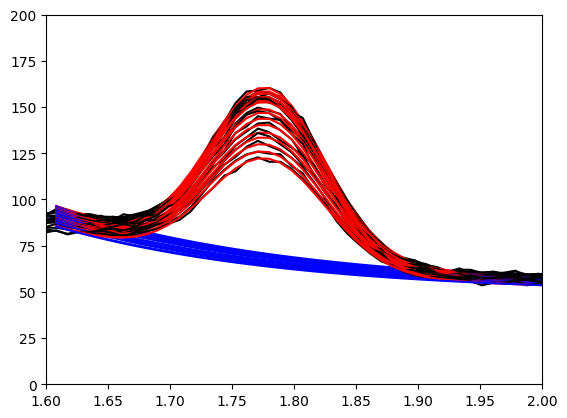

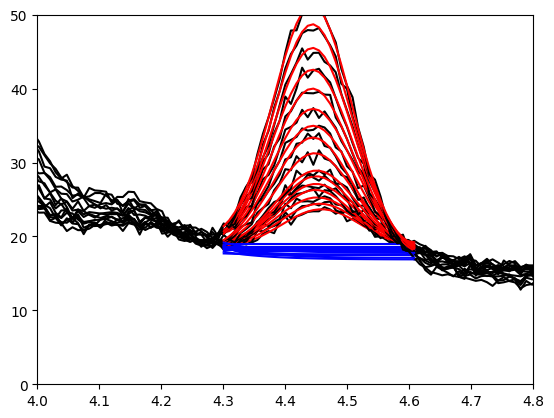

In [36]:
df = Analyzer.toDataFrame()
plt.figure()
for i in range(len(df)):
    plt.plot(df['bins'][i], df['vals'][i], color='black')
    plt.plot(df['fits'][i]['Si1']['bins'], df['fits'][i]['Si1']['peak'], color='red')
    plt.plot(df['fits'][i]['Si1']['bins'], df['fits'][i]['Si1']['baseline'], color='blue')
plt.xlim(1.6, 2)
plt.ylim(0, 200)
plt.show()

plt.figure()
for i in range(len(df)):
    plt.plot(df['bins'][i], df['vals'][i], color='black')
    plt.plot(df['fits'][i]['Si2C1']['bins'], df['fits'][i]['Si2C1']['peak'], color='red')
    plt.plot(df['fits'][i]['Si2C1']['bins'], df['fits'][i]['Si2C1']['baseline'], color='blue')
plt.xlim(4.0, 4.8)
plt.ylim(0, 50)
plt.show()


In [47]:
# turn spectrums into csv file

_frame = pd.DataFrame()
_frame['bins'] = bins
for i, spectrum in enumerate(spectrums):
    _frame[str(i)] = spectrum[0]

_frame.to_csv('spectrums.csv')

# Calibrate

In [37]:
Analyzer.calibrate(spec_labels, concentrations)

{'methods': {'Si1': 'original', 'Si2C1': 'original'},
 'weights': {'Si1': {'k1': np.float64(0.044399567921292904)},
  'Si2C1': {'k1': np.float64(0.0742344128262873),
   'k2': np.float64(18.02632577304526)}}}

In [38]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,concentration_C_0001_Si_4666,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.11, 0.1, 396.91, 535.72, 579.94, 657.28000...","{'Si1': 10.573682481618622, 'Si2C1': 0.8372544...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4666, 'Si2C1': 0.0001}","{'Si1': None, 'Si2C1': None}",True,False
1,concentration_C_008666666666666666_Si_4616,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.8, 0.09, 396.96, 533.6, 581.9, 656.27, 822...","{'Si1': 10.319673650169724, 'Si2C1': 0.9567391...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4616, 'Si2C1': 0.0086666666666666}","{'Si1': None, 'Si2C1': None}",True,False
2,concentration_C_017233333333333333_Si_4566,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.23, 395.73999999999995, 537.05000000...","{'Si1': 10.342555668928053, 'Si2C1': 1.1517110...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4566, 'Si2C1': 0.0172333333333333}","{'Si1': None, 'Si2C1': None}",True,False
3,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.28, 0.10999999999999999, 396.8400000000000...","{'Si1': 10.333113005251441, 'Si2C1': 1.1820006...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4516, 'Si2C1': 0.0258}","{'Si1': None, 'Si2C1': None}",True,False
4,concentration_C_03493333333333333_Si_446266666...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.959999999999997, 0.13999999999999999, 398....","{'Si1': 10.078936925502141, 'Si2C1': 1.3316703...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4462666666666666, 'Si2C1': 0.0349333...","{'Si1': None, 'Si2C1': None}",True,False
5,concentration_C_044066666666666664_Si_44093333...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.470000000000002, 0.06, 396.51, 536.77, 583...","{'Si1': 9.860824341324731, 'Si2C1': 1.35819865...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4409333333333333, 'Si2C1': 0.0440666...","{'Si1': None, 'Si2C1': None}",True,False
6,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.06, 396.72, 536.51, 585.09, 655.4200...","{'Si1': 9.75522752542507, 'Si2C1': 1.705455719...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4356, 'Si2C1': 0.0532}","{'Si1': None, 'Si2C1': None}",True,False
7,concentration_C_0738_Si_4236,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.7, 0.10999999999999999, 393.74, 539.62, 58...","{'Si1': 9.467281977919697, 'Si2C1': 1.99359820...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4236, 'Si2C1': 0.0738}","{'Si1': None, 'Si2C1': None}",True,False
8,concentration_C_0944_Si_4116,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.599999999999998, 0.06, 392.73999999999995,...","{'Si1': 9.254372669386235, 'Si2C1': 2.34446310...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4116, 'Si2C1': 0.0944}","{'Si1': None, 'Si2C1': None}",True,False
9,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.28, 0.1, 394.44, 536.58, 588.3, 658.9, 843...","{'Si1': 8.782094284637456, 'Si2C1': 2.88120974...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3996, 'Si2C1': 0.115}","{'Si1': None, 'Si2C1': None}",True,False


In [39]:
df = Analyzer.toDataFrame()
df['si_area'] = [x['Si1'] for x in df['areas']]
df['c_area'] = [x['Si2C1'] for x in df['areas']]
df['si_concentration'] = [x['Si1'] for x in df['true_comp']]
df['c_concentration'] = [x['Si2C1'] for x in df['true_comp']]

In [40]:
df

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed,si_area,c_area,si_concentration,c_concentration
0,concentration_C_0001_Si_4666,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.11, 0.1, 396.91, 535.72, 579.94, 657.28000...","{'Si1': 10.573682481618622, 'Si2C1': 0.8372544...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4666, 'Si2C1': 0.0001}","{'Si1': None, 'Si2C1': None}",True,False,10.573682,0.837254,0.466600,0.000100
1,concentration_C_008666666666666666_Si_4616,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.8, 0.09, 396.96, 533.6, 581.9, 656.27, 822...","{'Si1': 10.319673650169724, 'Si2C1': 0.9567391...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4616, 'Si2C1': 0.0086666666666666}","{'Si1': None, 'Si2C1': None}",True,False,10.319674,0.956739,0.461600,0.008667
2,concentration_C_017233333333333333_Si_4566,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.23, 395.73999999999995, 537.05000000...","{'Si1': 10.342555668928053, 'Si2C1': 1.1517110...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4566, 'Si2C1': 0.0172333333333333}","{'Si1': None, 'Si2C1': None}",True,False,10.342556,1.151711,0.456600,0.017233
3,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.28, 0.10999999999999999, 396.8400000000000...","{'Si1': 10.333113005251441, 'Si2C1': 1.1820006...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4516, 'Si2C1': 0.0258}","{'Si1': None, 'Si2C1': None}",True,False,10.333113,1.182001,0.451600,0.025800
4,concentration_C_03493333333333333_Si_446266666...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.959999999999997, 0.13999999999999999, 398....","{'Si1': 10.078936925502141, 'Si2C1': 1.3316703...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4462666666666666, 'Si2C1': 0.0349333...","{'Si1': None, 'Si2C1': None}",True,False,10.078937,1.331670,0.446267,0.034933
5,concentration_C_044066666666666664_Si_44093333...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.470000000000002, 0.06, 396.51, 536.77, 583...","{'Si1': 9.860824341324731, 'Si2C1': 1.35819865...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4409333333333333, 'Si2C1': 0.0440666...","{'Si1': None, 'Si2C1': None}",True,False,9.860824,1.358199,0.440933,0.044067
6,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.06, 396.72, 536.51, 585.09, 655.4200...","{'Si1': 9.75522752542507, 'Si2C1': 1.705455719...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4356, 'Si2C1': 0.0532}","{'Si1': None, 'Si2C1': None}",True,False,9.755228,1.705456,0.435600,0.053200
7,concentration_C_0738_Si_4236,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.7, 0.10999999999999999, 393.74, 539.62, 58...","{'Si1': 9.467281977919697, 'Si2C1': 1.99359820...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4236, 'Si2C1': 0.0738}","{'Si1': None, 'Si2C1': None}",True,False,9.467282,1.993598,0.423600,0.073800
8,concentration_C_0944_Si_4116,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.599999999999998, 0.06, 392.73999999999995,...","{'Si1': 9.254372669386235, 'Si2C1': 2.34446310...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4116, 'Si2C1': 0.0944}","{'Si1': None, 'Si2C1': None}",True,False,9.254373,2.344463,0.411600,0.094400
9,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.28, 0.1, 394.44, 536.58, 588.3, 658.9, 843...","{'Si1': 8.782094284637456, 'Si2C1': 2.88120974...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3996, 'Si2C1': 0.115}","{'Si1': None, 'Si2C1': None}",True,False,8.782094,2.881210,0.399600,0.115000


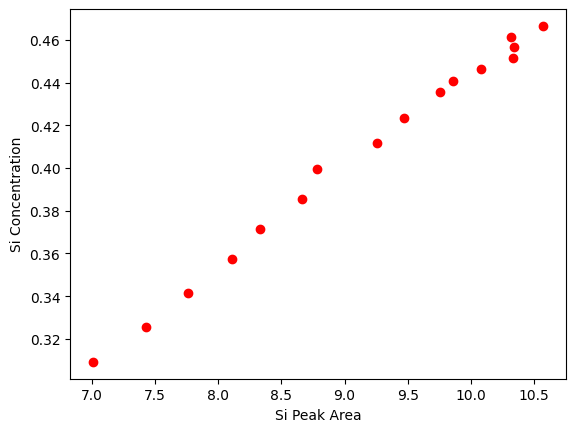

In [41]:
plt.figure()
plt.scatter(df['si_area'], df['si_concentration'], color='red')
plt.xlabel('Si Peak Area')
plt.ylabel('Si Concentration')
plt.show()

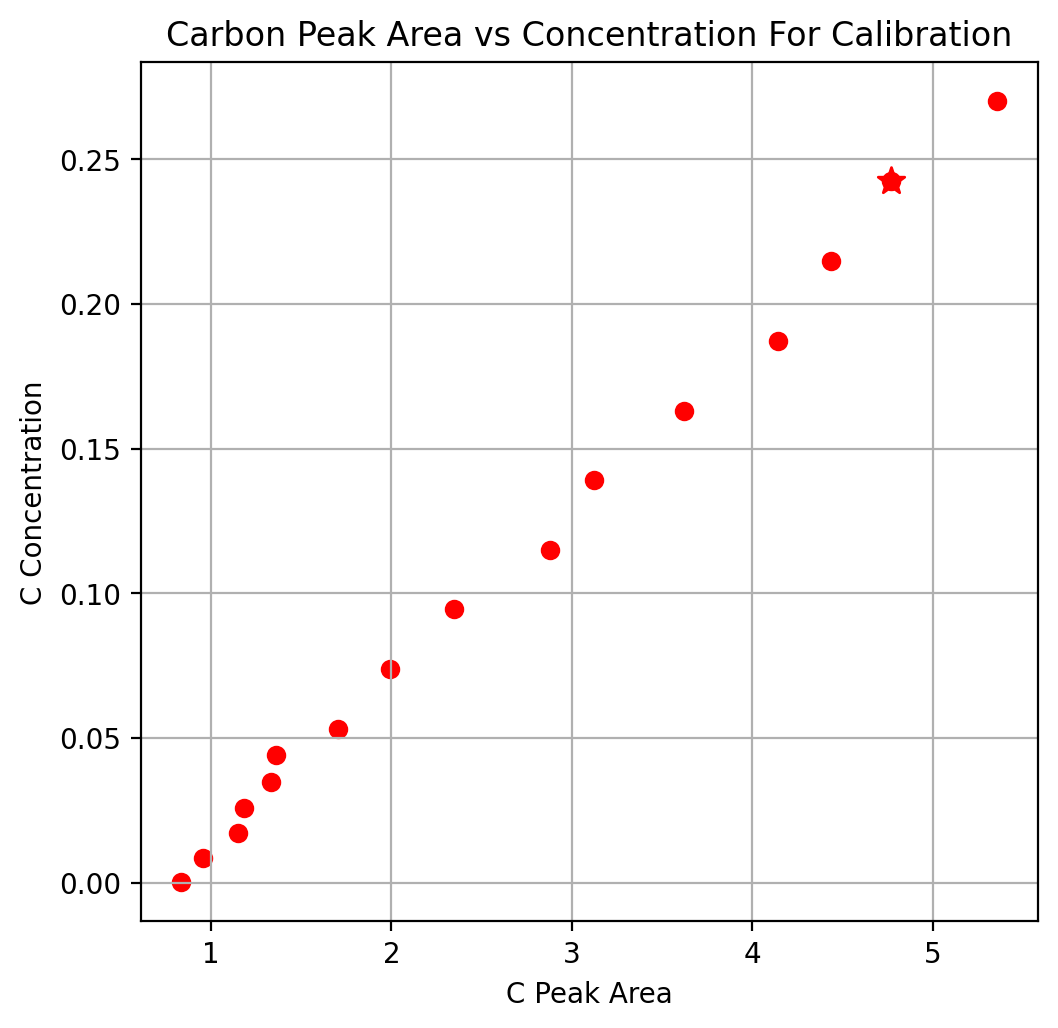

In [42]:
# graph true_comp vs areas
plt.figure(frameon=False, figsize=(5.79, 5.58), dpi=200)
plt.scatter(df['c_area'], df['c_concentration'], color='red')
# star point
plt.scatter(df.loc[14]['c_area'], df.loc[14]['c_concentration'], color='red', marker='*', s=100)
plt.xlabel('C Peak Area')
plt.ylabel('C Concentration')
plt.title('Carbon Peak Area vs Concentration For Calibration')
plt.grid()
plt.show()

# now areas vs true_comp
# plt.figure(frameon=False, figsize=(5.79, 5.58), dpi=200)
# plt.scatter(df['c_concentration'], df['c_area'], color='red')
# plt.xlabel('C Concentration')
# plt.ylabel('C Peak Area')
# plt.title('Carbon Peak Area vs Concentration For Calibration')
# plt.show()



In [43]:
df

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed,si_area,c_area,si_concentration,c_concentration
0,concentration_C_0001_Si_4666,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.11, 0.1, 396.91, 535.72, 579.94, 657.28000...","{'Si1': 10.573682481618622, 'Si2C1': 0.8372544...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4666, 'Si2C1': 0.0001}","{'Si1': None, 'Si2C1': None}",True,False,10.573682,0.837254,0.466600,0.000100
1,concentration_C_008666666666666666_Si_4616,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.8, 0.09, 396.96, 533.6, 581.9, 656.27, 822...","{'Si1': 10.319673650169724, 'Si2C1': 0.9567391...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4616, 'Si2C1': 0.0086666666666666}","{'Si1': None, 'Si2C1': None}",True,False,10.319674,0.956739,0.461600,0.008667
2,concentration_C_017233333333333333_Si_4566,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.23, 395.73999999999995, 537.05000000...","{'Si1': 10.342555668928053, 'Si2C1': 1.1517110...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4566, 'Si2C1': 0.0172333333333333}","{'Si1': None, 'Si2C1': None}",True,False,10.342556,1.151711,0.456600,0.017233
3,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.28, 0.10999999999999999, 396.8400000000000...","{'Si1': 10.333113005251441, 'Si2C1': 1.1820006...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4516, 'Si2C1': 0.0258}","{'Si1': None, 'Si2C1': None}",True,False,10.333113,1.182001,0.451600,0.025800
4,concentration_C_03493333333333333_Si_446266666...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.959999999999997, 0.13999999999999999, 398....","{'Si1': 10.078936925502141, 'Si2C1': 1.3316703...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4462666666666666, 'Si2C1': 0.0349333...","{'Si1': None, 'Si2C1': None}",True,False,10.078937,1.331670,0.446267,0.034933
5,concentration_C_044066666666666664_Si_44093333...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.470000000000002, 0.06, 396.51, 536.77, 583...","{'Si1': 9.860824341324731, 'Si2C1': 1.35819865...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4409333333333333, 'Si2C1': 0.0440666...","{'Si1': None, 'Si2C1': None}",True,False,9.860824,1.358199,0.440933,0.044067
6,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.06, 396.72, 536.51, 585.09, 655.4200...","{'Si1': 9.75522752542507, 'Si2C1': 1.705455719...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4356, 'Si2C1': 0.0532}","{'Si1': None, 'Si2C1': None}",True,False,9.755228,1.705456,0.435600,0.053200
7,concentration_C_0738_Si_4236,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.7, 0.10999999999999999, 393.74, 539.62, 58...","{'Si1': 9.467281977919697, 'Si2C1': 1.99359820...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4236, 'Si2C1': 0.0738}","{'Si1': None, 'Si2C1': None}",True,False,9.467282,1.993598,0.423600,0.073800
8,concentration_C_0944_Si_4116,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.599999999999998, 0.06, 392.73999999999995,...","{'Si1': 9.254372669386235, 'Si2C1': 2.34446310...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4116, 'Si2C1': 0.0944}","{'Si1': None, 'Si2C1': None}",True,False,9.254373,2.344463,0.411600,0.094400
9,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.28, 0.1, 394.44, 536.58, 588.3, 658.9, 843...","{'Si1': 8.782094284637456, 'Si2C1': 2.88120974...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3996, 'Si2C1': 0.115}","{'Si1': None, 'Si2C1': None}",True,False,8.782094,2.881210,0.399600,0.115000


In [44]:
Analyzer.calibration

{'methods': {'Si1': 'original', 'Si2C1': 'original'},
 'weights': {'Si1': {'k1': np.float64(0.044399567921292904)},
  'Si2C1': {'k1': np.float64(0.0742344128262873),
   'k2': np.float64(18.02632577304526)}}}

# Results

In [45]:
Analyzer.applyCalibrationAreas(spec_labels)

{'concentration_C_0001_Si_4666': {'Si1': 0.4694669335208109,
  'Si2C1': 0.002902604920973383},
 'concentration_C_008666666666666666_Si_4616': {'Si1': 0.45818905115628733,
  'Si2C1': 0.010576989364029857},
 'concentration_C_017233333333333333_Si_4566': {'Si1': 0.4592050029023241,
  'Si2C1': 0.021298711735663563},
 'concentration_C_0258_Si_4516': {'Si1': 0.4587857527150564,
  'Si2C1': 0.023017893712962277},
 'concentration_C_03493333333333333_Si_44626666666666664': {'Si1': 0.4475004445982594,
  'Si2C1': 0.03236746091219313},
 'concentration_C_044066666666666664_Si_44093333333333334': {'Si1': 0.43781634010258574,
  'Si2C1': 0.0347373148426474},
 'concentration_C_0532_Si_4356': {'Si1': 0.4331278871027765,
  'Si2C1': 0.054436058914930675},
 'concentration_C_0738_Si_4236': {'Si1': 0.42034322920867784,
  'Si2C1': 0.07160638870102883},
 'concentration_C_0944_Si_4116': {'Si1': 0.41089014790337086,
  'Si2C1': 0.09194720040420995},
 'concentration_C_115_Si_3996': {'Si1': 0.38992119168195893,
  'S

In [46]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,concentration_C_0001_Si_4666,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.11, 0.1, 396.91, 535.72, 579.94, 657.28000...","{'Si1': 10.573682481618622, 'Si2C1': 0.8372544...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4666, 'Si2C1': 0.0001}","{'Si1': 0.4694669335208109, 'Si2C1': 0.0029026...",True,False
1,concentration_C_008666666666666666_Si_4616,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.8, 0.09, 396.96, 533.6, 581.9, 656.27, 822...","{'Si1': 10.319673650169724, 'Si2C1': 0.9567391...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4616, 'Si2C1': 0.0086666666666666}","{'Si1': 0.45818905115628733, 'Si2C1': 0.010576...",True,False
2,concentration_C_017233333333333333_Si_4566,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.23, 395.73999999999995, 537.05000000...","{'Si1': 10.342555668928053, 'Si2C1': 1.1517110...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4566, 'Si2C1': 0.0172333333333333}","{'Si1': 0.4592050029023241, 'Si2C1': 0.0212987...",True,False
3,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.28, 0.10999999999999999, 396.8400000000000...","{'Si1': 10.333113005251441, 'Si2C1': 1.1820006...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4516, 'Si2C1': 0.0258}","{'Si1': 0.4587857527150564, 'Si2C1': 0.0230178...",True,False
4,concentration_C_03493333333333333_Si_446266666...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.959999999999997, 0.13999999999999999, 398....","{'Si1': 10.078936925502141, 'Si2C1': 1.3316703...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4462666666666666, 'Si2C1': 0.0349333...","{'Si1': 0.4475004445982594, 'Si2C1': 0.0323674...",True,False
5,concentration_C_044066666666666664_Si_44093333...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.470000000000002, 0.06, 396.51, 536.77, 583...","{'Si1': 9.860824341324731, 'Si2C1': 1.35819865...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4409333333333333, 'Si2C1': 0.0440666...","{'Si1': 0.43781634010258574, 'Si2C1': 0.034737...",True,False
6,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.37, 0.06, 396.72, 536.51, 585.09, 655.4200...","{'Si1': 9.75522752542507, 'Si2C1': 1.705455719...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4356, 'Si2C1': 0.0532}","{'Si1': 0.4331278871027765, 'Si2C1': 0.0544360...",True,False
7,concentration_C_0738_Si_4236,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.7, 0.10999999999999999, 393.74, 539.62, 58...","{'Si1': 9.467281977919697, 'Si2C1': 1.99359820...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4236, 'Si2C1': 0.0738}","{'Si1': 0.42034322920867784, 'Si2C1': 0.071606...",True,False
8,concentration_C_0944_Si_4116,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[22.599999999999998, 0.06, 392.73999999999995,...","{'Si1': 9.254372669386235, 'Si2C1': 2.34446310...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4116, 'Si2C1': 0.0944}","{'Si1': 0.41089014790337086, 'Si2C1': 0.091947...",True,False
9,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[21.28, 0.1, 394.44, 536.58, 588.3, 658.9, 843...","{'Si1': 8.782094284637456, 'Si2C1': 2.88120974...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3996, 'Si2C1': 0.115}","{'Si1': 0.38992119168195893, 'Si2C1': 0.123667...",True,False
